# INFO 5810 Data Analysis and Knowledge Discovery 

Topic : Disaster data mining based on social media texts

Group Team 7

Project Second Submission




Dataset: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets?resource=download

we have choosen above disaster dataset from the twitter social media platform as it has most of all disasters happen in various locations around the united states it have fields like id,keyword,location,text,target where target is 1 will defines the disater incident as real.


Github url: https://github.com/Haryanth/Project-group-7

Please refer to the README file in above github url for explanation of analysis done.



In [3]:
from google.colab import files
upload = files.upload()

Saving tweets.csv to tweets.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt2

# Importing and reading csv file
df = pd.read_csv("./tweets.csv")
                 

# First 5 records 
print("The first five records are ")
df.head(5)
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))

The first five records are 
The number of rows and columns are  11370 and 5


Data Cleaning:
 1. Analysis on empty cells
    1. Finding number of empty cells present in the data set.
    2. Deciding whether to replace the data with mean, mode, median etc or to remove the empty cells.
 2. Removing Duplicates if present in the data set.

In [5]:
# Analysis by removing empty cells

new_df = df.dropna()
print("The number of rows and columns are ",len(new_df.axes[0]),'and',len(new_df.axes[1]))

The number of rows and columns are  7952 and 5


In [6]:
# As there are nearly 4k records were removed, it is good to replace those empty values 
# Finding number of missing values present in each column 

print(' The number of missing values in each column are ')
print(df.isnull().sum())

 The number of missing values in each column are 
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [7]:
# From above analysis it is evident that the location column only has missing values
# Finding different values in location column and their counts

print(df.location.value_counts())

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64


In [8]:
# Number of Unique values in location column

n = len(pd.unique(df['location']))  
print("No.of.unique values :", n)

No.of.unique values : 4505


In [9]:
# From the above trend, as location are nominal type of values and there are 4505 unique values in it.
# The count of mode is 96 which is way small when compared to 8k records.
# It is best to remove those records

# Removing missing records
df.dropna(inplace = True)
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))
print("Missing values in each column are ")
print(df.isnull().sum())

The number of rows and columns are  7952 and 5
Missing values in each column are 
id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [10]:
# Different columns and their data types

print('Columns and their data types are ')
print(df.info())

Columns and their data types are 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952 entries, 2 to 11368
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7952 non-null   int64 
 1   keyword   7952 non-null   object
 2   location  7952 non-null   object
 3   text      7952 non-null   object
 4   target    7952 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 372.8+ KB
None


In [11]:
# Removing duplicates

df.drop_duplicates(inplace = True)

In [12]:
print("The number of rows and columns are ",len(df.axes[0]),'and',len(df.axes[1]))

The number of rows and columns are  7952 and 5


In [13]:
# From above it is evident that there are no duplicates in the data.

In [14]:
df.to_csv('./disasters_cleaned.csv', index=False)

In [15]:
df

,id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
...,...,...,...,...,...
11362,11362,wrecked,feuille d'érable,Stell wrecked ako palagi sayo. Haha. #ALABTopS...,0
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0


In [24]:
# Description of Data
df.describe()

,id,target
count,7952.000000,7952.000000
mean,5679.721705,0.192530
std,3260.075795,0.394312
min,2.000000,0.000000
25%,2854.750000,0.000000
50%,5674.500000,0.000000
75%,8507.500000,0.000000
max,11368.000000,1.000000


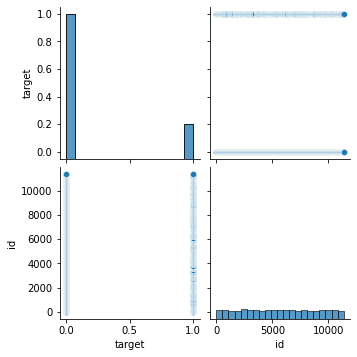

In [16]:
sns.pairplot(df[['target','location','keyword','id']]);

From the above pairplot graph - uses numeric variables for plot, i.e Target and Id variables for plotting, `Target` variable has only two values `0` and `1` and `Id` variable have unique values for each record.

In [17]:
# Lets get count of all the unique values of Keyword variable.
disaster_types = df['keyword'].unique()
print("Types of Disasters reported:\n\n", 'location')
print("Occurrences:\n\n",df['keyword'].value_counts())

Types of Disasters reported:

 location
Occurrences:

 flattened       71
thunderstorm    70
collision       66
engulfed        66
stretcher       64
                ..
exploded        11
siren            7
deluged          6
rainstorm        6
tsunami          5
Name: keyword, Length: 219, dtype: int64


Now, plot the count of unique keyword variable using histogram 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


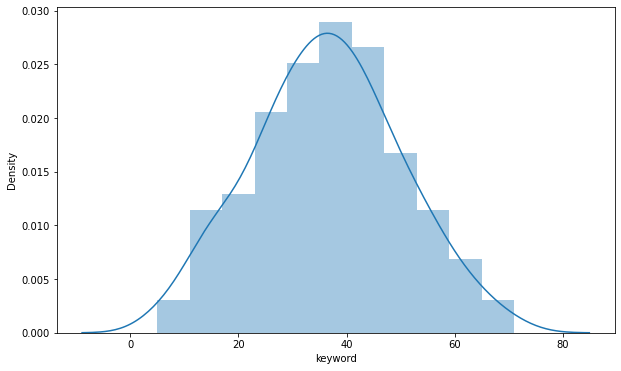

In [19]:
plt2.pyplot.figure(figsize=(10,6))
sns.distplot(df['keyword'].value_counts());

From the above Histogram, the middle most and longest bar is `flattened` value of `Keyword` variable, and second longest bar is `thunderstorm`.

In [21]:
# Creating a new column with count values of keyword variable
p = df[['keyword', 'location']]
p.groupby(['location'])
p_count = (p.groupby(['keyword']).count())
p_count

,location
keyword,
ablaze,17
accident,27
aftershock,34
airplane%20accident,54
ambulance,26
...,...
wounded,26
wounds,33
wreck,42


In the above dataframe, there is a column created with `location` as column name.

Lets have a look at the frequency of locations a disaster occurred in the country.

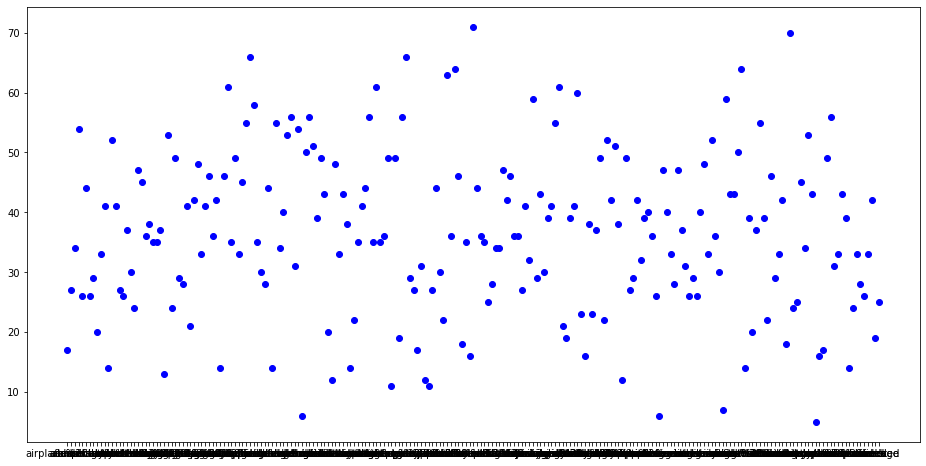

In [22]:
plt2.pyplot.figure(figsize=(16,8))
plt.scatter(p_count.index, p_count['location'], c='blue')
plt.show()

In [23]:
# Lets find out the disasters most faced in Texas location.
print("Texas mostly faces:\n")
df[['location','keyword']].groupby('location').max().loc['TX']

Texas mostly faces:



keyword    electrocute
Name: TX, dtype: object

From the above `electrocute` is the most occurring disaster in Texas.

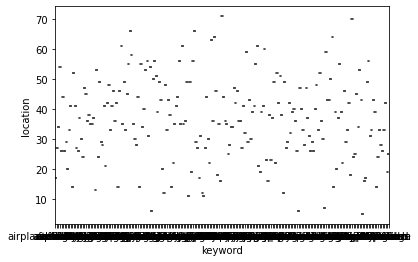

In [25]:
# Detecting outliners
sns.boxplot(x=p_count.index, y=p_count['location'])

From the above graph, we can see few of the less dense clusters formed. the most outliers that deviate from the analysis, are the keyword values that have less number of occurrences.

Out of which tsunami and rainstorms are the eligible as outliers and can be ingored.

Contributions : - 



Vineeth Akula – 11591902 {Data cleaning}

Udayram Vanam – 11519685 {Code}

Haryanth Gosika - 11604529 {code}

Nikhil Mallepaka - 11601263 {Dataset}

Uday Kiran Reddy Kotha - 11608672 {Requirement and Analysis}

Sridhar Goud Maddi – 11610534 {Requirement and Analysis}









